# Юнит экономика

# Оглавление:
* [Шаг 1. Изучение общей информации, подоготовка данных:](#1-bullet)
* [Загрузка библиотек, изученеие файлов с данными, получение общей информации.Первичные выводы.](#1-bullet)
* [Подготовка данных](#2-bullet)
* [Шаг 2. Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.](#3-bullet)
* [Шаг 3. Исследовательский анализ данных](#4-bullet)
* [3.1 Профили пользователей. Минимальная и максимальная даты привлечения пользователей.](#4-bullet)
* [3.2 География пользователей. Количество пользователей и доля платящих из каждой страны.](#5-bullet)
* [3.3 Предпочитаемые устройства. Количество пользователей и доля платящих для каждого устройства.](#5-bullet)
* [3.4 Источники платного трафика. Количество пользователей и доля платящих для каждого канала привлечения](#6-bullet)
* [Шаг 4. Маркетинг](#7-bullet)
* [4.1 Рассчет общей суммы расходов на маркетинг.](#7-bullet)
* [4.2 Распреледение расходов по источникам привлечения пользователей](#8-bullet)
* [4.3 Динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.](#9-bullet)
* [4.4 Расчет CAC](#10-bullet)
* [4.5 Промежуточные выводы](#11-bullet)
* [Шаг 5. Оценка окупаемости рекламы](#12-bullet)
* [5.1 Оценка окупаемости рекламы c помощью графиков LTV и ROI. Графики динамики LTV, CAC и ROI.](#12-bullet)
* [5.2 Конверсия и удержание пользователей.](#13-bullet)
* [5.1 Оценка LTV, CAC и ROI в разбивке по устройствам.](#14-bullet)
* [5.1 Оценка LTV, CAC и ROI в разбивке по странам.](#15-bullet)
* [5.2 Оценка LTV, CAC и ROI в разбивке по рекламным каналам.](#16-bullet)
* [Шаг 6. Итоговые выводы, рекомендации для маркетинга](#17-bullet)

|  Название  |  Описание  |
| :----: |  :---- |
|  **Вводная информация**  | Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.|
|  **Основное задание проекта**  |  Разобраться в причинах неэффективности вложений в рекламу и помочь компании выйти в плюс.|
| **Датасет с информацией о посещениях сайта**             | /datasets/visits_info_short.csv |
| **Датасет с информацией о заказах**             | /datasets/orders_info_short.csv |
| **Датасет с информацией о расходах на рекламу**             | /datasets/costs_info_short.csv |

## Шаг 1. Изучение общей информации, подоготовка данных: <a id="#1-bullet"></a>

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as npм

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv("C:/Users/zarus/Downloads/visits_info_short.csv")
    orders = pd.read_csv("C:/Users/zarus/Downloads/orders_info_short.csv")
    costs = pd.read_csv('C:/Users/zarus/Downloads/costs_info_short.csv')
    
display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
visits.info()
visits.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


0

В датасете visits необходимо изменить типы данных в столбцах Session Start и Session End, также сменим название столбцов, приведем название к нижнему регистру. Дубликатов и пропусков в датасете нет.

In [4]:
orders.info()
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


0

В датасете orders необходимо изменить типы данных в столбце Event Dt, также сменим название столбцов, приведем название к нижнему регистру. Дубликатов и пропусков в датасете нет.

In [5]:
costs.info()
costs.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


0

В датасете costs необходимо изменить типы данных в столбце dt, также сменим название столбца Channel, приведем название к нижнему регистру. Дубликатов и пропусков в датасете нет.

### Подготовка данных <a id="#2-bullet"></a>

In [6]:
#переименуем столбцы
visits = visits.rename(
    columns={'User Id': 'user_id', 'Region': 'region',
             'Device': 'device', 'Channel':'channel', 
             'Session Start': 'session_start', 'Session End': 'session_end'}
)
orders = orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'})
costs = costs.rename(columns={'Channel': 'channel'})

In [7]:
#поправим типы данных в столбцах с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

## Шаг 2. Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии. <a id="#3-bullet"></a>

In [8]:
# функции для вычисления значений метрик
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs, events = None, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [9]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [10]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [12]:
# функции для построения графиков
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [13]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [14]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=14):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [15]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=14):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Шаг 3. Исследовательский анализ данных <a id="#4-bullet"></a>

### 3.1 Профили пользователей. Минимальная и максимальная даты привлечения пользователей. <a id="#4-bullet"></a>

In [16]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [17]:
#минимальная и максимальная дата привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
display('Минимальная дата привлечения', min_analysis_date)
display('Максимальная дата привлечения', max_analysis_date)
#момент и горизонт анализа данных.
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

'Минимальная дата привлечения'

datetime.date(2019, 5, 1)

'Максимальная дата привлечения'

datetime.date(2019, 10, 27)

Применив функцию get_profiles мы получала таблицу с профилями пользователей, с разбивкой по стране, девайсу, источнику привлечения, а также получили данные производил ли пользователь оплаты и сколько ушло затрат на его привлечение. 

Определили минимальную дату привлечения = дате начала исследования 01.05.2019 и максимальную дату привлечения - 27.10.2019 года, момент анализа 01.11.2019, горизонт - 14 дней.

### 3.2 География пользователей. Количество пользователей и доля платящих из каждой страны. <a id="#5-bullet"></a>

In [18]:
#пранализируем пользователей с разбивкой по странам
country = profiles.groupby('region').agg(
    {'user_id': 'nunique', 'payer':'sum'}).sort_values('user_id', ascending=False).rename(columns={'payer': 'payers_total'})
#посчитаем долю платящих пользователей
country['payers_share_%'] = ((country['payers_total']/country['user_id'])*100).round(2)
country

,user_id,payers_total,payers_share_%
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


Наибольшее количество уникальных пользователей из США, наименьшее - из Германии, из Британии и Франции привлечено примерно одинаковое количесво пользователей, доля платяших пользователей также наиболее высокая в США, самая низкая - среди пользователей из Франции.

### 3.3 Предпочитаемые устройства. Количество пользователей и доля платящих для каждого устройства. <a id="#6-bullet"></a>

In [19]:
#пранализируем пользователей с разбивкой по девайсам
device = profiles.groupby('device').agg(
    {'user_id': 'nunique', 'payer':'sum'}).sort_values('user_id', ascending=False).rename(columns={'payer': 'payers_total'})
#посчитаем долю платящих пользователей
device['payers_share_%'] = ((device['payers_total']/device['user_id'])*100).round(2)
device

,user_id,payers_total,payers_share_%
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05
Mac,30042,1912,6.36


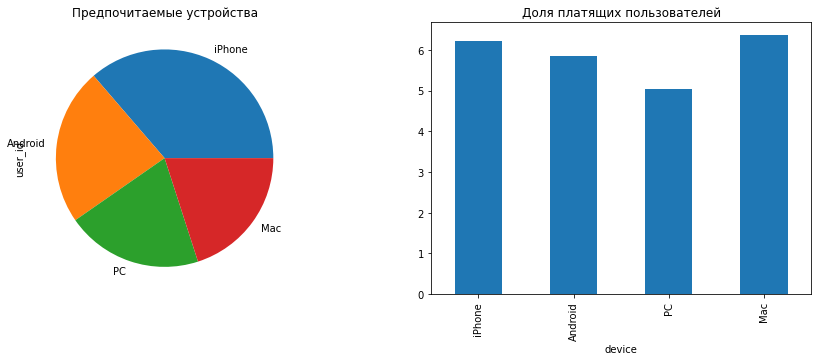

In [20]:
plt.figure(figsize=(15, 5))

# Распределение по устройствам
ax1 = plt.subplot(1, 2, 1)
device['user_id'].plot(kind='pie', title = 'Предпочитаемые устройства');

# Доля платящих пользователей
ax2 = plt.subplot(1, 2, 2)
device['payers_share_%'].plot(kind='bar', title = 'Доля платящих пользователей');
plt.show();

Наибольшее число пользователей использует iPhone, на втором месте по популярности Android, это означает, что большая часть пользователей посещает сайт с мобильных устройств. Пользователей пришедших с PC и Mac(3 и 4 место сообветственно) практически равное количество.

Доля платящих пользователей самая высокая среди клиентов использующих Mac - 6,36% и iPhone - 6,21%, меньше всего платящих среди пользователей PC - 5,05%.

### 3.4 Источники платного трафика. Количество пользователей и доля платящих для каждого канала  привлечения <a id="#7-bullet"></a>

In [21]:
#пранализируем пользователей с разбивкой по источникам привлечения
channel = profiles.groupby('channel').agg(
    {'user_id': 'nunique', 'payer':'sum'}).sort_values('user_id', ascending=False).rename(columns={'payer': 'payers_total'})
#посчитаем долю платящих пользователей
channel['payers_share_%'] = ((channel['payers_total']/channel['user_id'])*100).round(2)
channel['users_%'] = ((channel['user_id']/sum(channel['user_id']))*100).round(2)
channel

,user_id,payers_total,payers_share_%,users_%
channel,,,,
organic,56439,1160,2.06,37.62
FaceBoom,29144,3557,12.20,19.43
TipTop,19561,1878,9.60,13.04
OppleCreativeMedia,8605,233,2.71,5.74
LeapBob,8553,262,3.06,5.70
WahooNetBanner,8553,453,5.30,5.70
RocketSuperAds,4448,352,7.91,2.97
MediaTornado,4364,156,3.57,2.91
YRabbit,4312,165,3.83,2.87


In [22]:
channel = channel.sort_values('payers_share_%', ascending=False)
channel

,user_id,payers_total,payers_share_%,users_%
channel,,,,
FaceBoom,29144,3557,12.20,19.43
AdNonSense,3880,440,11.34,2.59
lambdaMediaAds,2149,225,10.47,1.43
TipTop,19561,1878,9.60,13.04
RocketSuperAds,4448,352,7.91,2.97
WahooNetBanner,8553,453,5.30,5.70
YRabbit,4312,165,3.83,2.87
MediaTornado,4364,156,3.57,2.91
LeapBob,8553,262,3.06,5.70


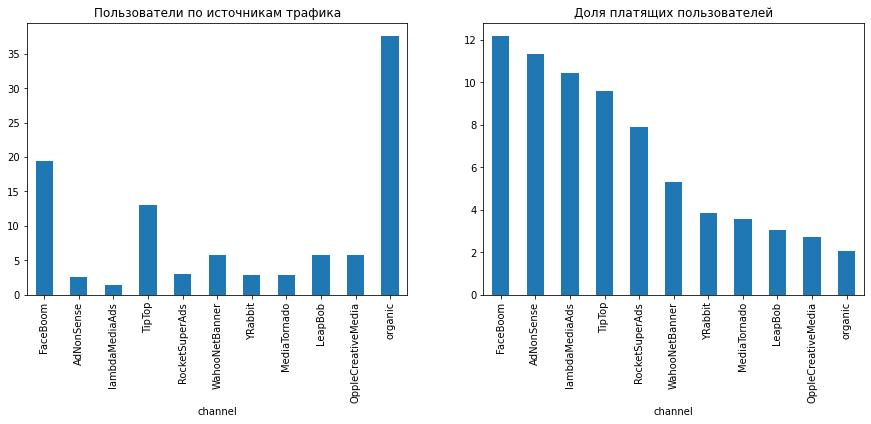

In [23]:
plt.figure(figsize=(15, 5))

# Распределение по устройствам
ax1 = plt.subplot(1, 2, 1)
channel['users_%'].plot(kind='bar', title = 'Пользователи по источникам трафика');

# Доля платящих пользователей
ax2 = plt.subplot(1, 2, 2)
channel['payers_share_%'].plot(kind='bar', title = 'Доля платящих пользователей');
plt.show();

На сайт компании клиенты приходят из 11 разных источников (каналов привлечения), в том числе 1 бесплатный - органический трафик, и 10 платных источников трафика. Наибольшее число пользователей органические более 37%, на втором месте FaceBoom - 19%, на 3-ем TipTop - 13%, меньше всего пользователей привлечено из lambdaMediaAds - лишь 1,43%.

Наибольшая доля платящих пользователей у источников FaceBoom - 12.2%, AdNonSense - 11,34% и lambdaMediaAds - 10,47%, хуже всех в платящих конвертируются органические пользователи - 2,06%, а среди платных источников OppleCreativeMedia - 2,71%.

## Шаг 4. Маркетинг <a id="#8-bullet"></a>

### 4.1 Рассчет общей суммы расходов на маркетинг. <a id="#8-bullet"></a>

In [24]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [25]:
#посчитаем сколько всего расходом на рекламу понесла компания
display(costs['costs'].sum().round(2))

105497.3

Всего на рекламу было потрачено 105 497,3$

### 4.2 Распреледение расходов по источникам привлечения пользователей <a id="#9-bullet"></a>

In [26]:
#проанализируем как расходы на рекламу распределены по источникам трафика
costs_to_channel = costs.groupby('channel').agg({'costs':'sum'}).sort_values('costs', ascending=False)
costs_to_channel['costs_ratio'] = ((costs_to_channel['costs']/(costs_to_channel['costs'].sum()))*100).round(2)
costs_to_channel

,costs,costs_ratio
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


<AxesSubplot:title={'center':'Источники привлечения трафика'}, ylabel='costs'>

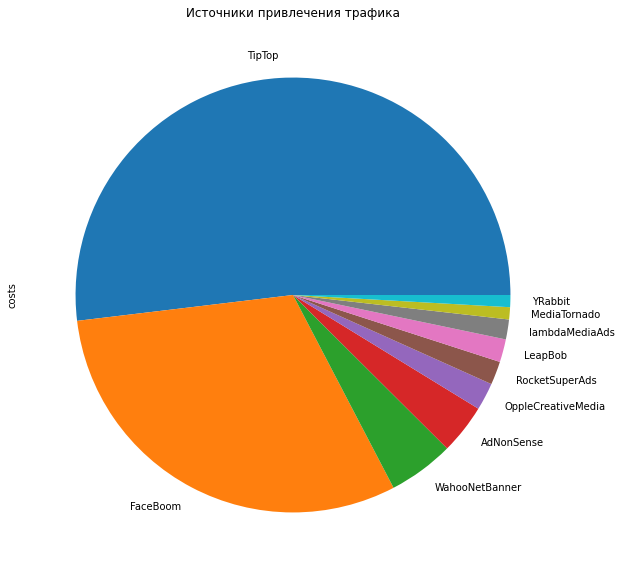

In [27]:
plt.figure(figsize=(10, 10))
costs_to_channel['costs'].plot(kind='pie', title = 'Источники привлечения трафика')

Более половины расходов (51,9%) пришлось на источник TipTop, 30% на FaceBoom, минимум рекламы закуплено у MediaTornado и YRabbit (менее 1% от общих расходов).

### 4.3 Динамика изменения расходов во времени (по неделям и месяцам) по каждому источнику. <a id="#10-bullet"></a>

In [28]:
#что бы посчитать еженедельные и ежемесяцные расходы добавим столбцы с номером недели и месяца
costs['week_costs'] = costs['dt'].astype('datetime64[W]')
costs['month_costs'] = costs['dt'].astype('datetime64[M]')

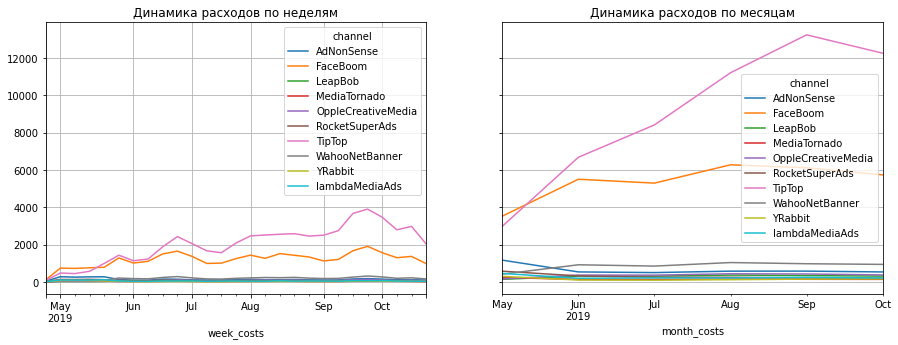

In [29]:
plt.figure(figsize=(15, 5))

# Строим график по неделям
ax1 = plt.subplot(1, 2, 1)
costs.pivot_table(index='channel', columns='week_costs', values = 'costs', aggfunc = ({'costs':'sum'})).T.plot(grid=True, ax=ax1);
plt.title('Динамика расходов по неделям');

# Строим график по месяцам
ax2 = plt.subplot(1, 2, 2, sharey = ax1)
costs.pivot_table(index='channel', columns='month_costs', values = 'costs', aggfunc = ({'costs':'sum'})).T.plot(grid=True, ax=ax2);
plt.title('Динамика расходов по месяцам');
plt.show();

Как видно из графиков команда проекта сделала ставку на 2 основных источика трафика TipTop и FaceBoom, причем если по источнику FaceBoom затраты в пиковые месяцы всего на 50% выше первоначальных трат, то по источнику TipTop в сентябре затраты были выше начальных бболее чем в 3 раза. На остальные  источники из недели в неделю, из месяца в месяц расходуются примерно одни и теже суммы. 

Здесь можно выделить 1 проблему, основной упор в рекламе сделан только на 2 источника, если они не рентабельны - рекламная компания не окупиться.

### 4.4 Расчет CAC <a id="#11-bullet"></a>

In [30]:
# рассчитываем максимально возможную дату привлечения
last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)

# считаем средний CAC по каналам привлечения
cac_profiles = profiles.query('dt <= @last_suitable_acquisition_date')
cac = (
    cac_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
    .sort_values('cac', ascending=False)
)

cac

,cac
channel,
TipTop,2.757774
FaceBoom,1.113419
AdNonSense,1.008023
lambdaMediaAds,0.727237
WahooNetBanner,0.601856
RocketSuperAds,0.417431
OppleCreativeMedia,0.249908
MediaTornado,0.219035
YRabbit,0.217087


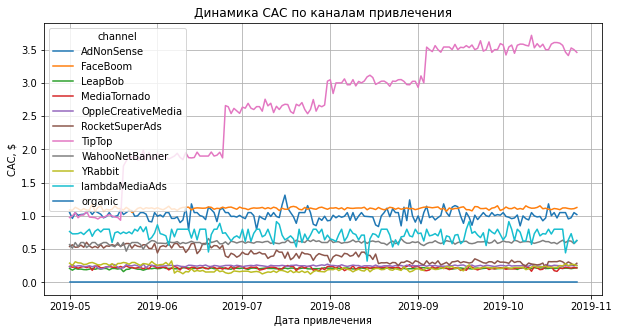

In [31]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

Исходя из динамики изменения стоимости привлечыения одного посетителя можно сделать вывод, что с каждым месяцем для канала TipTop САС увеличивается примерно на 50 центов, и в конце исследования САС по данному каналу составляет 3,5 доллара на человека, в то время как по остальным каналам САС не превышает 1 доллара. Это говорит о том, что компания ежемесячно увеличивает рекламный бюджет в данном канале.

### 4.5 Промежуточные выводы <a id="#12-bullet"></a>

Команда проекта "положила все яйца в одну корзину", и стоимость привлечения посетителя в данной корзине растет из-месяца в месяц, остальные источники трафика финансируются по остаточному принципу. Необходимо посчитать ROI что бы определить как окупаются вложения в рекламу.

## Шаг 5. Оценка окупаемости рекламы <a id="#13-bullet"></a>

### 5.1 Оценка окупаемости рекламы c помощью графиков LTV и ROI. Графики динамики LTV, CAC и ROI. <a id="#13-bullet"></a>

In [32]:
# удалим из фрейма органических пользователей
profiles_raw = profiles.query('channel != "organic"')
profiles_raw

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


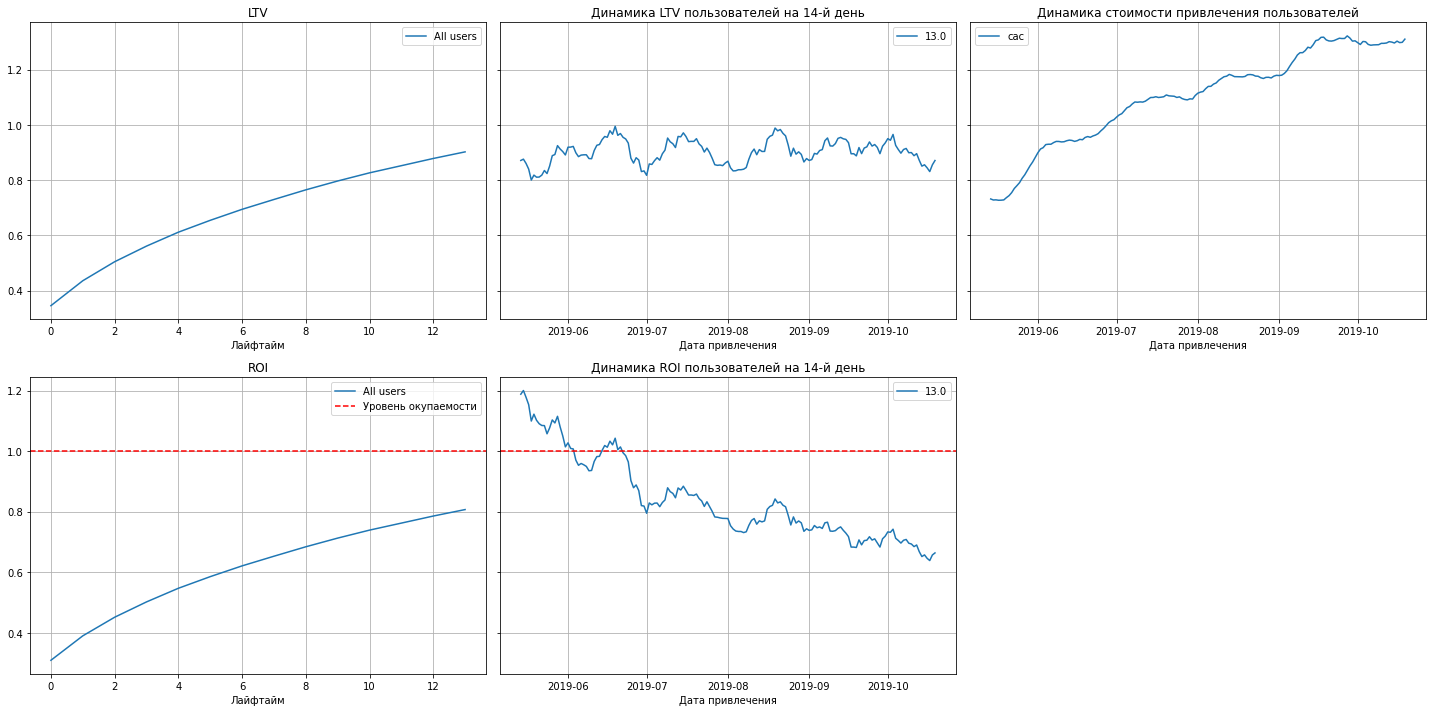

In [33]:
#для расчетов LTV и ROI вызовем функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_raw, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сказать: реклама не окупается, причем реклама окупалась в 1 месяц, но далее ROI имеет нисходящий тренд. В первую очередь это связано в ростом стоимости привлечения. Показатель динамики LTV говорит о том, что каких-то сезонных пиков нет.

### 5.2 Конверсия и удержание пользователей. <a id="#14-bullet"></a>

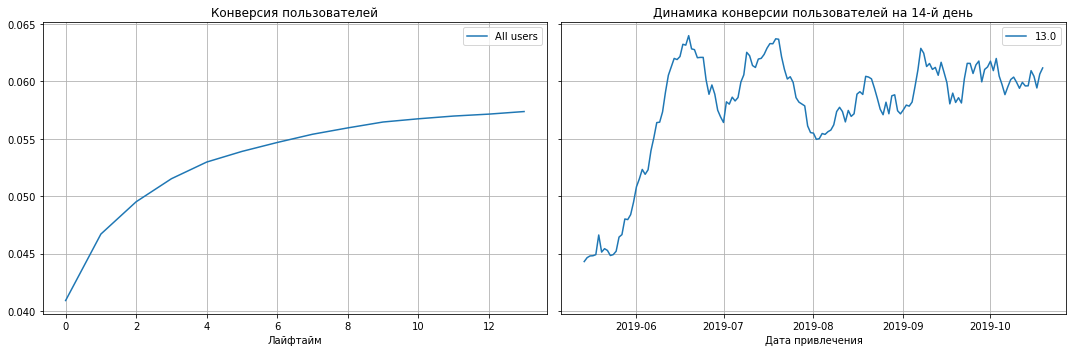

In [34]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия к концу 2-й недели примерно 8%, в динамике конверсия на 14 день колеблеться от 7,5 до 8,5 %.

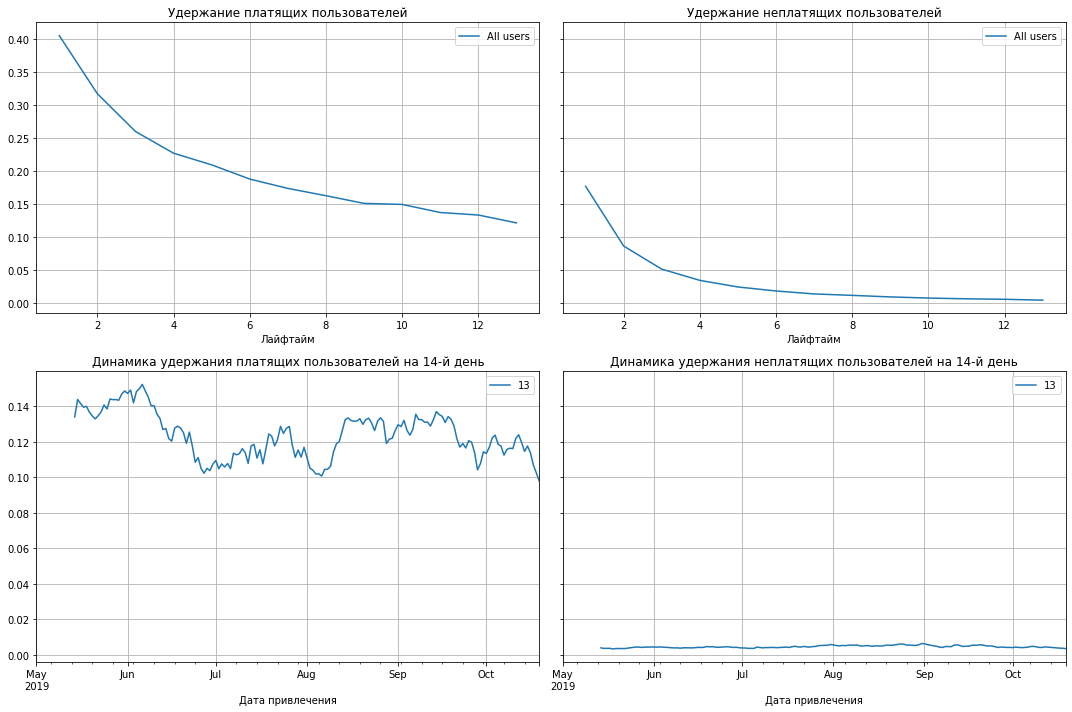

In [35]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание ожидаемо падает с 35% до примерно 10% к концу 2-й неделе, самое высокое удержание на 14 день в июне,а самое низкое - в августе. Удержание неплатящих клиентов низкое и практически не меняется в динамике.

### 5.3 Оценка LTV, CAC и ROI в разбивке по устройствам. <a id="#15-bullet"></a>

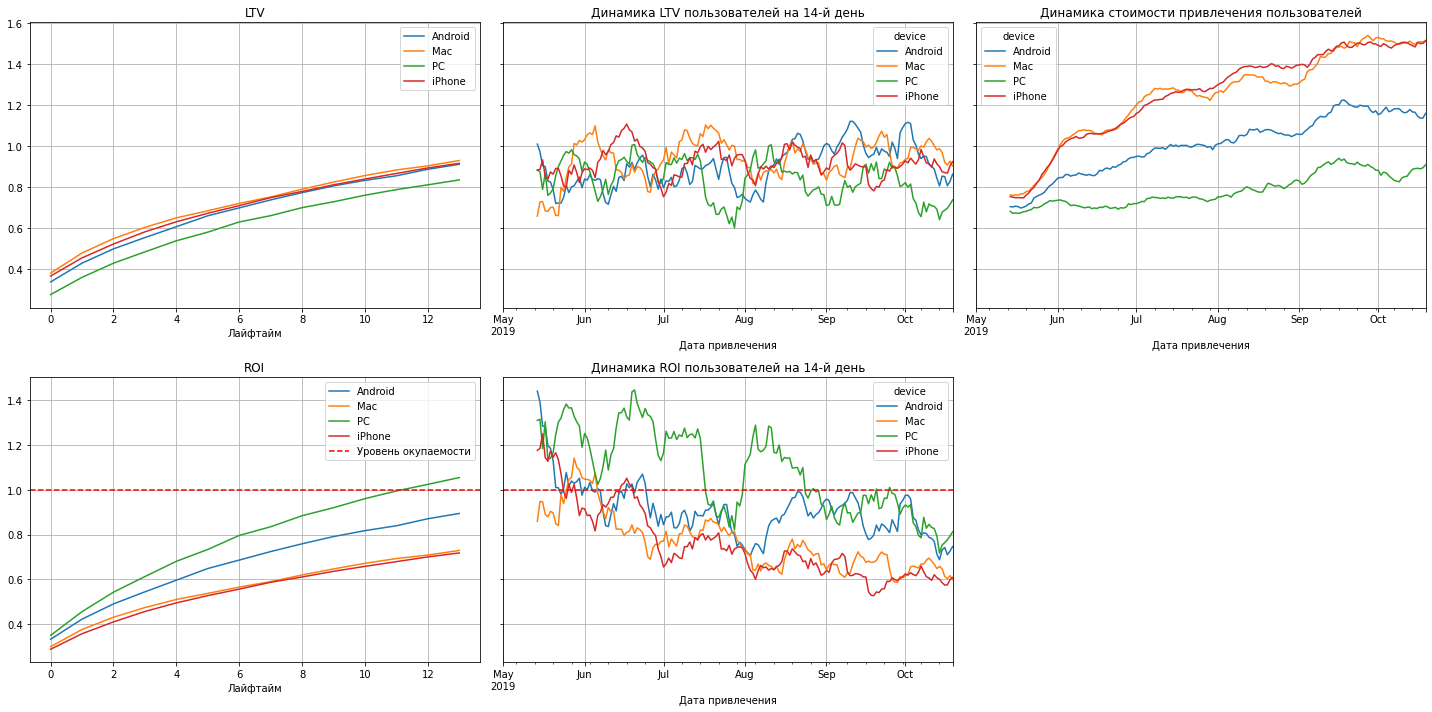

In [36]:
#задаем пораметр dimension
dimensions=['device']
#для расчетов LTV и ROI вызовем функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_raw, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

В результате разбивки по устройствам мы видим, что к концу 14 дней (согласно бизнес-плану) окупаются только пользователи PC, самая низкая окупаемость у iPhone и Mac, виной тому высокая стоимость привлечения пользователей на данных устройствах, ведь LTV пользователей всех платформ примерно равен в динамике. Пользователи PC окупаются практически всегда, самые высокие показатели в июле, а самые низкие в августе и октябре. 

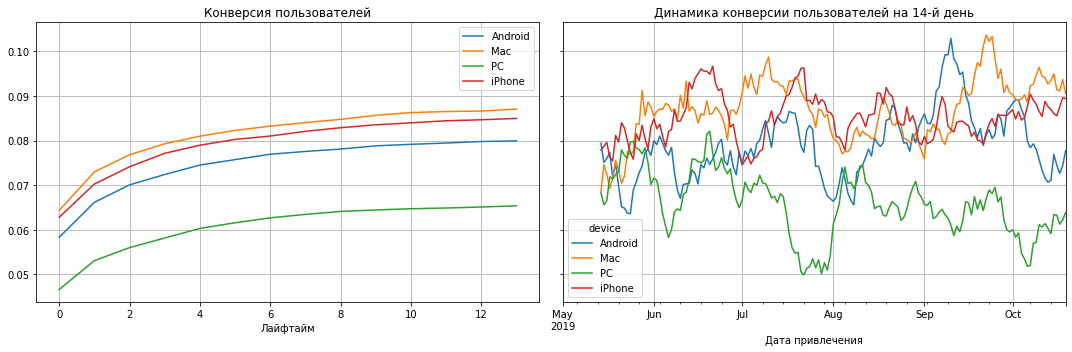

In [37]:
#проанализируем конверсию по устройствам
#задаем пораметр dimension
dimensions=['device']

# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_raw, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

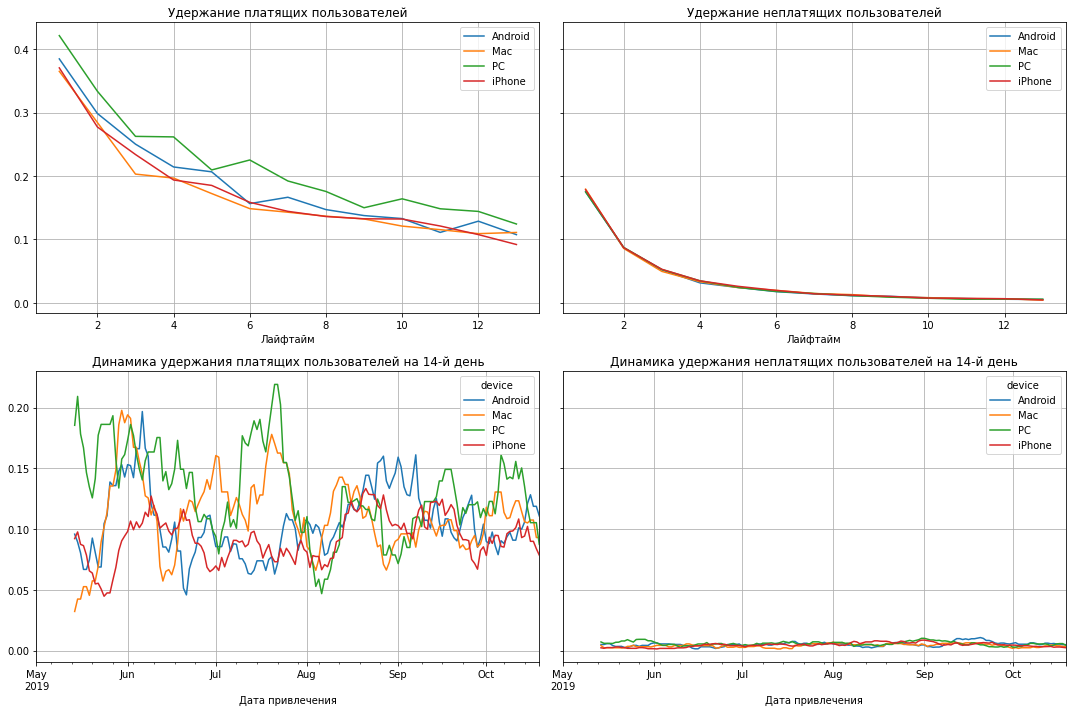

In [38]:
#проанализируем удержание по регионам
#задаем пораметр dimension
dimensions=['device']

# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_raw, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Самая высокая конверсия у iPhone и Mac, Android немного уступает, PC показывает конверсию примерно на треть ниже. Однако удержание PC немного выше чем на остальных устройствах.

### 5.4 Оценка LTV, CAC и ROI в разбивке по странам. <a id="#16-bullet"></a>

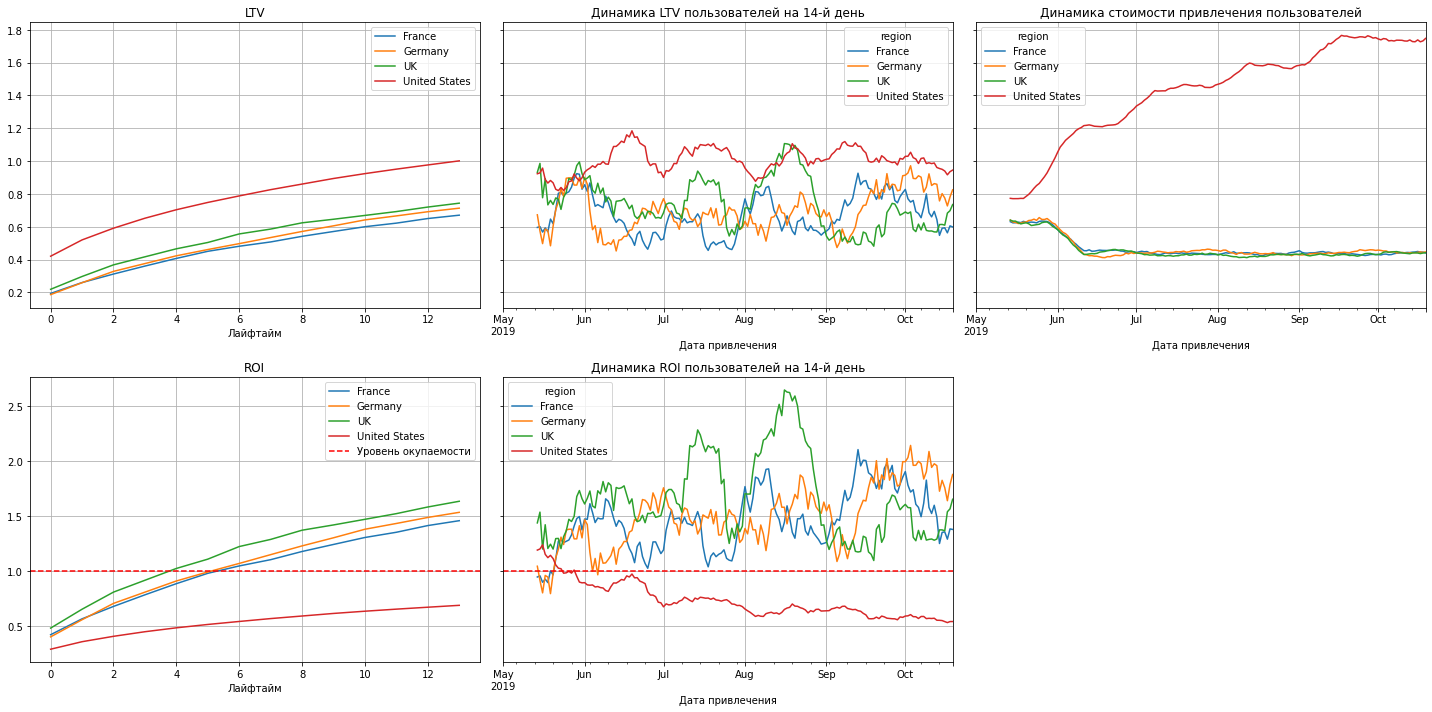

In [39]:
#задаем пораметр dimension
dimensions=['region']
#для расчетов LTV и ROI вызовем функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_raw, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Самый высокий уровень LTV в США, в том числе в динамике, однако расходы на привлечение пользователей в данной стране в разы превосходят другие страны, в связи с чем вложения в рекламу не окупаются только в США. Пик окупаемости приходиться на Великобританию на конец августа - начало сентября.

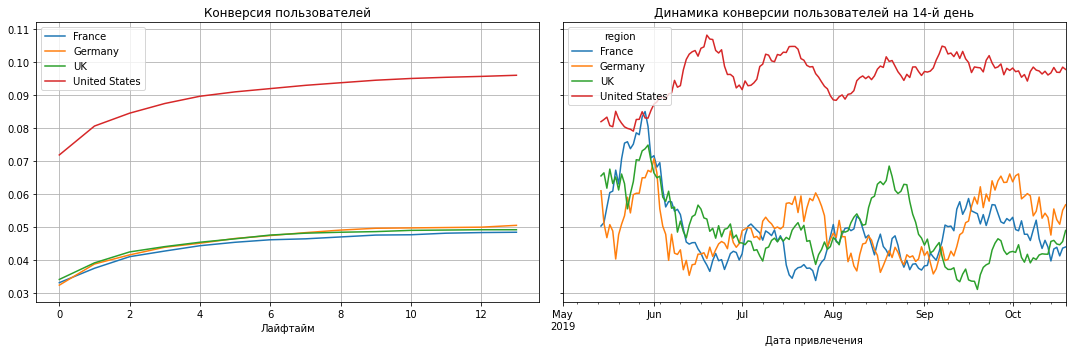

In [40]:
#проанализируем конверсию по регионам
#задаем пораметр dimension
dimensions=['region']

#смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_raw, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

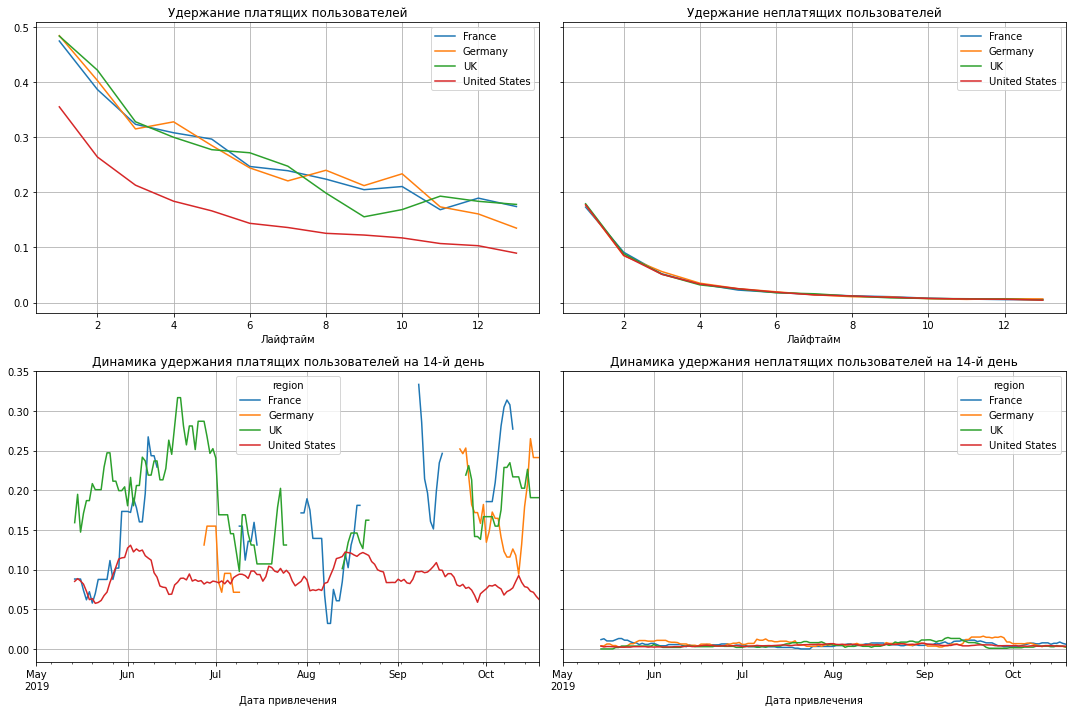

In [41]:
#проанализируем удержание по регионам
#задаем пораметр dimension
dimensions=['region']

# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_raw, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В США самая высокая конверсия, причем как на 14-й день так и в динамике, однако самое низкое удержаниен клиентов, возможно глядя на высокую конверсию в США компания и сосредоточила основные усилия в рекламе именно на этом рынке, в других станах конверсия практически одинаковая и в среднем в 2 раза ниже чем в США, однако удержание клиентов довольно сильно изменяется в динамике, но в среднем всегда выше. Удержание в динамике сложно проанализировать, много пропусков в данных.

### 5.5 Оценка LTV, CAC и ROI в разбивке по рекламным каналам. <a id="#17-bullet"></a>

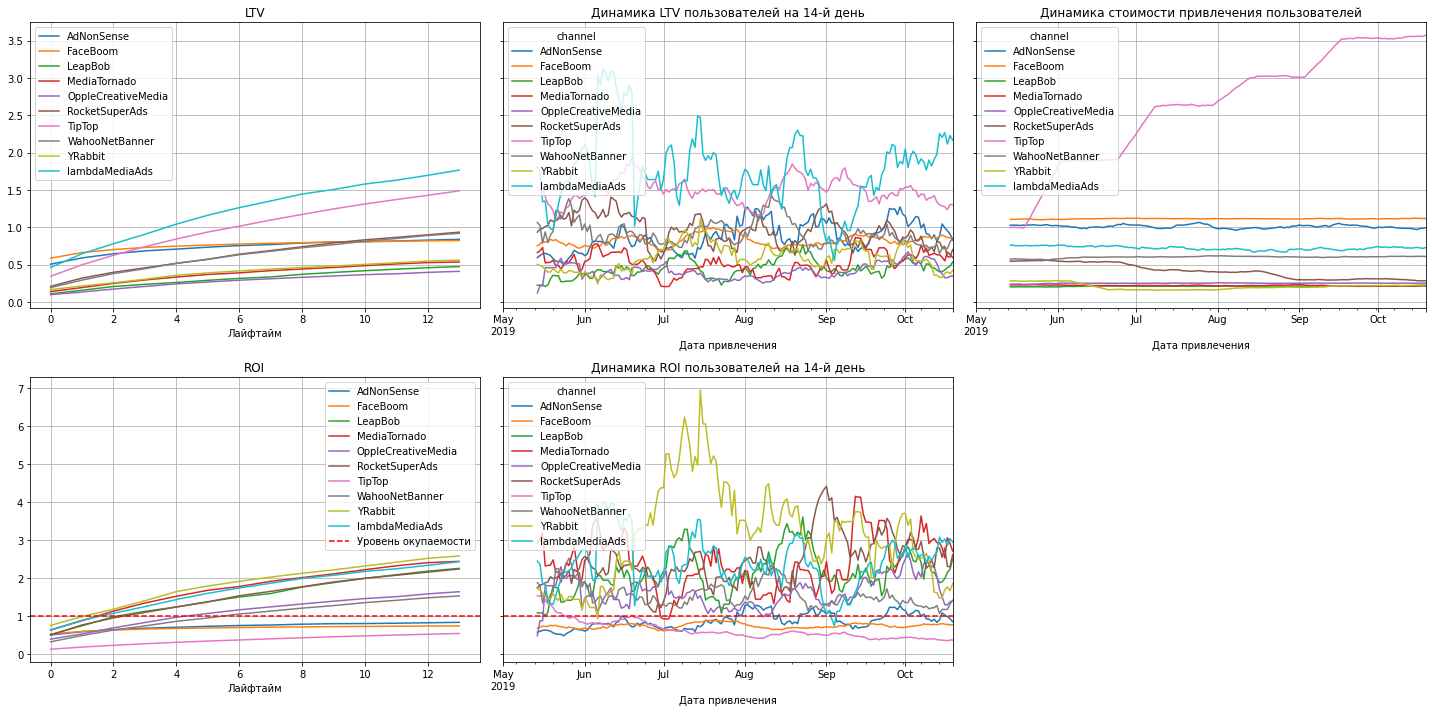

In [42]:
#задаем пораметр dimension
dimensions=['channel']
#для расчетов LTV и ROI вызовем функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_raw, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

А вот и основная проблема: клиенты из 2-х самых популярных источников привлечения стабильно не окупаются. Лучше всех окупаются клиенты пришедшие через Yrabbit в пике (июль-август) окупаемость составила до 700%. Компании нужно срочно пересматривать маркетинговую политику, и перераспределить рекламный бюджет, необходимо перестать вкачивать деньги Tip-Top и FaceBoom, привлечение клиентов в данных каналах неоправдано дорого, также практически не окупается канал AdNonSence, его также стоит исключить из рекламной компании. 

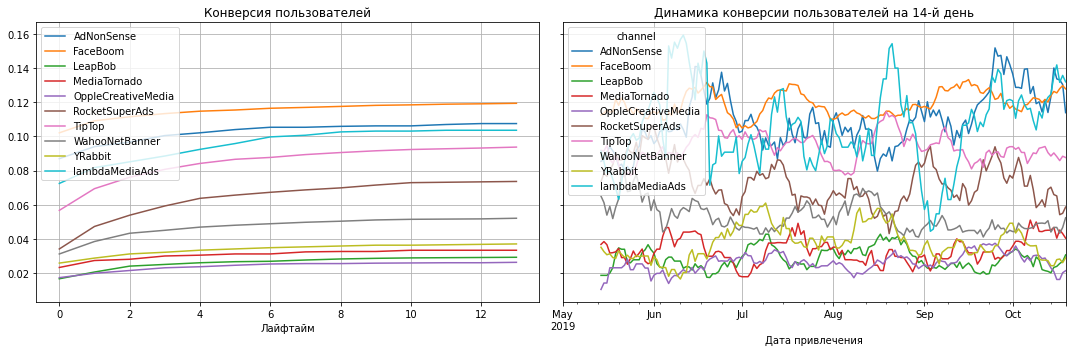

In [43]:
#проанализируем конверсию по каналам
#задаем пораметр dimension
dimensions=['channel']

# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_raw, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

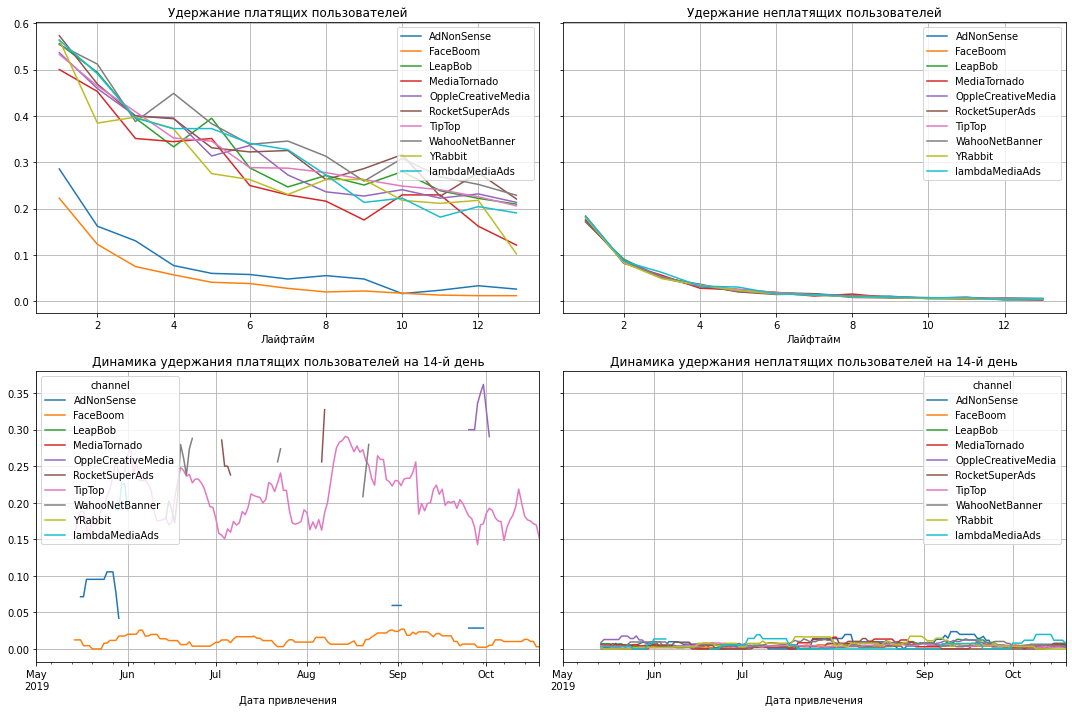

In [44]:
#проанализируем удержание по каналам
#задаем пораметр dimension
dimensions=['channel']

# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_raw, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Как не странно, но не окупающиеся каналы Tip-Top, FaceBoom, AdNonSence, показывают самую высокую конверсию, однако FaceBoom, AdNonSence имеют самое низкое удержание. Канал Tip-Top неплохо удерживает пользователей, но имеет очень высокую цену привлечения CAC, по всей видимость цена привлечения пользователя сильно выше среднего чека покупки, поэтому данные каналы не окупаются. Самый оптимальный канал привлечения lambdaMediaAds (высокая конверсия на 14-й день, лучшая конверсия в динамике, высокое удержание платящих пользователей и низкая стоимоть привлечения, это оптимальный выбор для марккетологов на текущий момент. Также можно присмотреться к каналам WahooNetBanner и RocketSuperAds, неплохие конверсия и удерждание низкая стоимость заявки. Канал Yrabbit также выглядел довольно прибыльным с точки зрения ROI, но это в основном связано с низким  CAC, ведь конверсия и удержание у канала не самые выдающиеся.

Что бы дать рекомендации для отдельных регионов, сделаем срез только для США и только для Европы и проанализируем источники трафика.

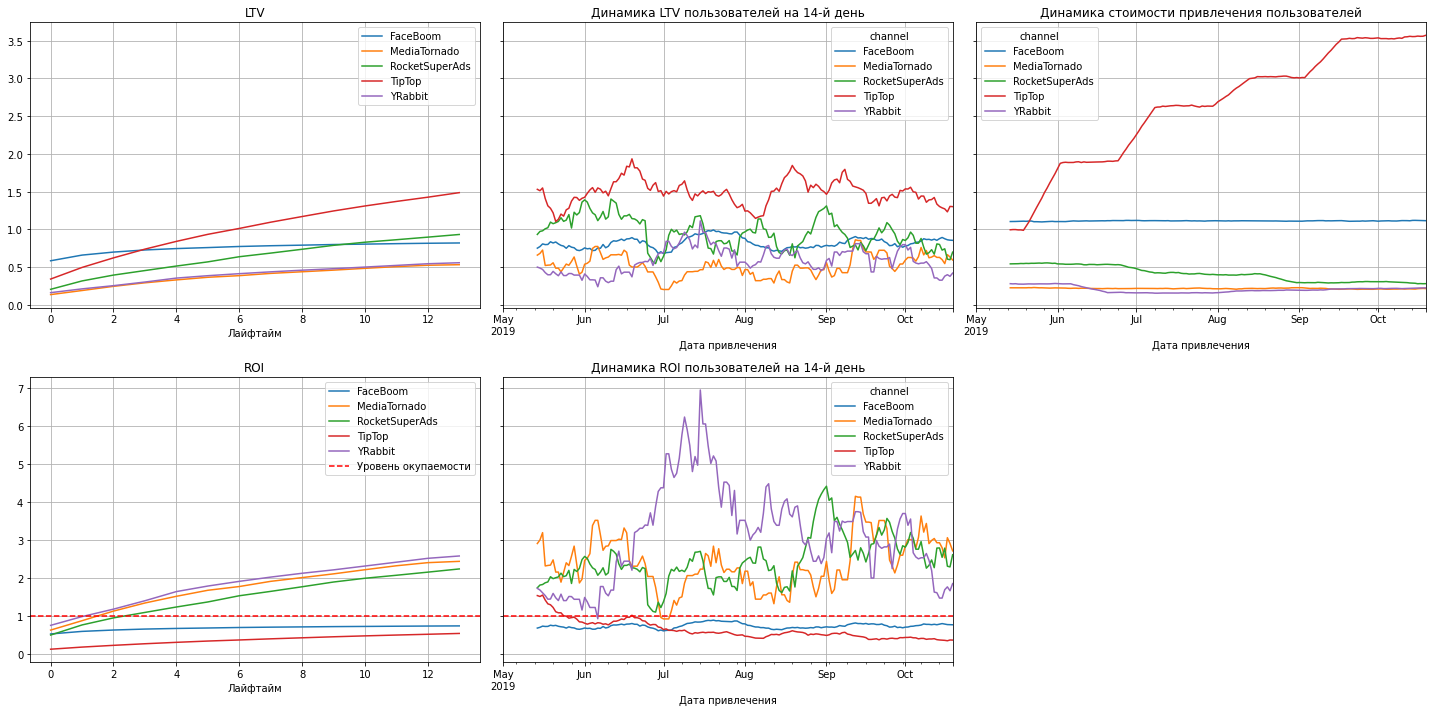

In [45]:
#посмотрим на каналы привлечения только в США
profiles_raw_usa = profiles_raw.query('region=="United States"')
#задаем пораметр dimension
dimensions=['channel']
#для расчетов LTV и ROI вызовем функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_raw_usa, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

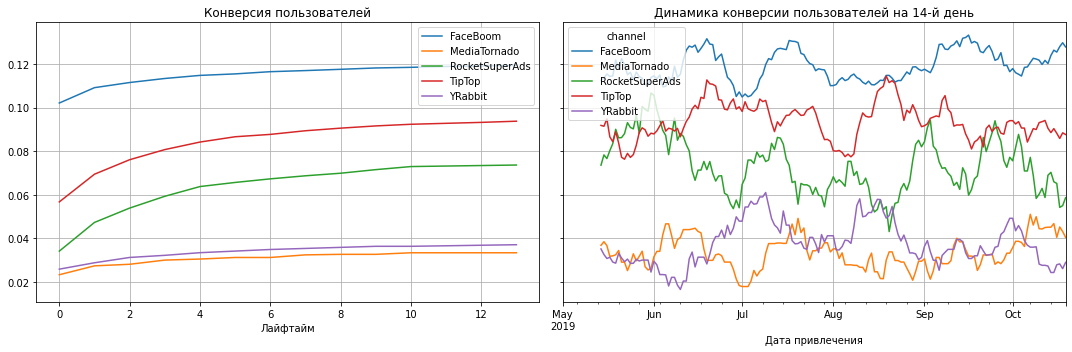

In [46]:
#проанализируем конверсию по каналам в США
#задаем пораметр dimension
dimensions=['channel']

# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_raw_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

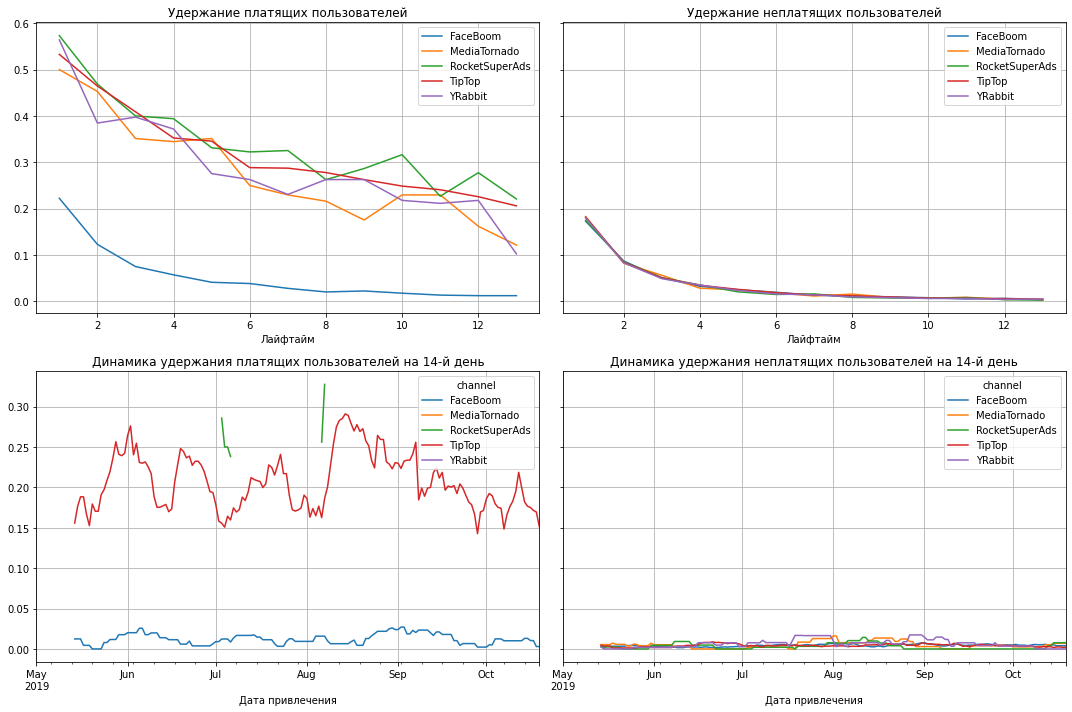

In [47]:
#проанализируем удержание по каналам в США
#задаем пораметр dimension
dimensions=['channel']

# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_raw_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Выделили только рынок США и проанализировали каналы привлечения для данного региона. Так не окупаются только каналы Tip-Top и FaceBoom. FaceBoom имеет самую высокую конверсию, однако удержание, напротив самое низкое, Tip-Top - высокая конверсия и удержание, но стоимость рекламы слишком дорогая.

Для США оптимальным каналом продвижения должен стать RocketSuperAds - у него неплохая конверсия и лучшее удержание, а наряду с низкой стоимостью привлечения можноы выйти на хороший уровень прибыли. Канал YRabbit при низкой конверсии показывает хорошее улдержание клиентов, а также имеет самую низкую стоимость CAC и самый высокий ROI в динамике.

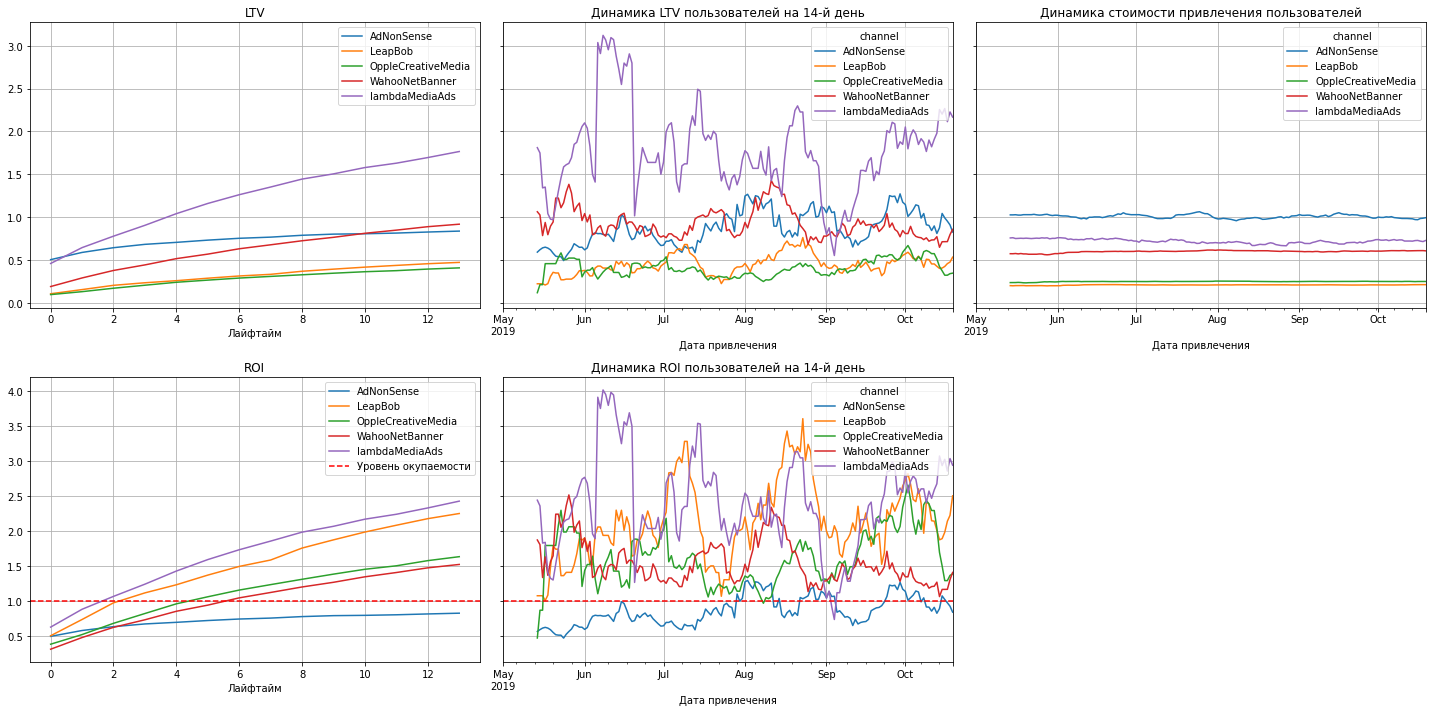

In [48]:
#посмотрим на каналы привлечения только в Европе
profiles_raw_europe = profiles_raw.query('region!="United States"')
#задаем пораметр dimension
dimensions=['channel']
#для расчетов LTV и ROI вызовем функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_raw_europe, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

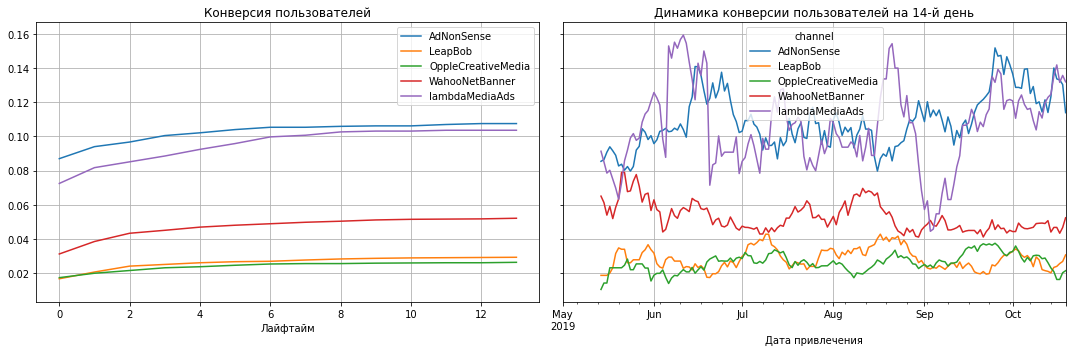

In [49]:
#проанализируем конверсию по каналам в Европе
#задаем пораметр dimension
dimensions=['channel']

# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_raw_europe, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

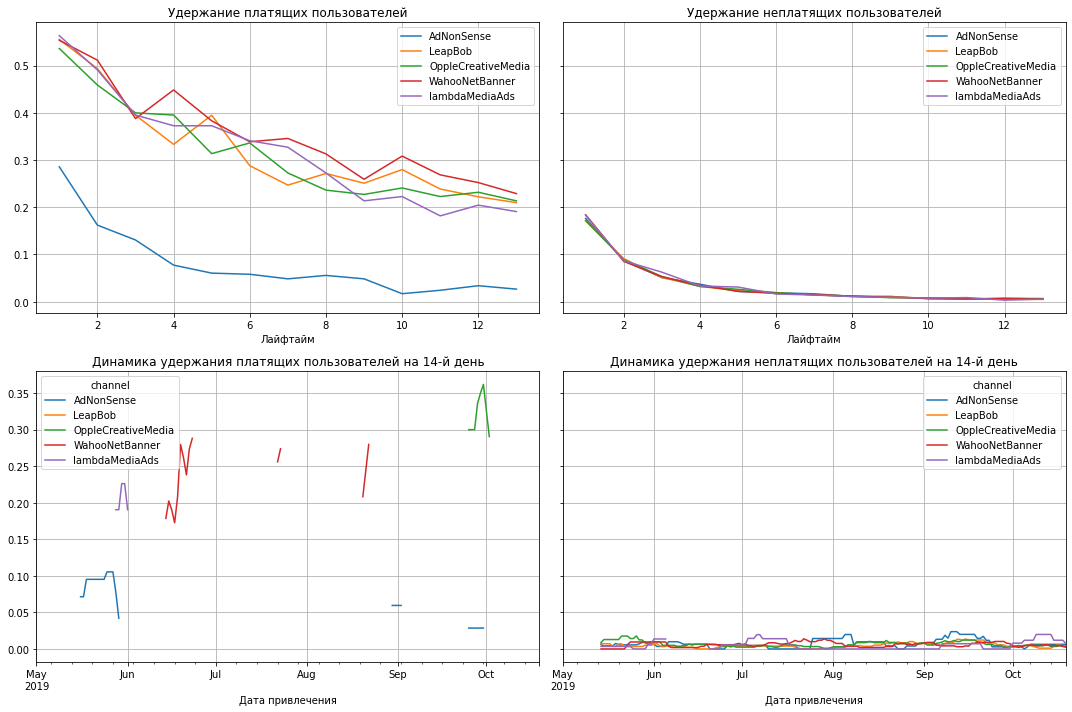

In [50]:
#проанализируем удержание по каналам в Европе
#задаем пораметр dimension
dimensions=['channel']

# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_raw_europe, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Для Европы рекомендации следующие: лучший канал - LambdaMediaAds (высокая конверсия, лучшая в динамике и высокое удержание, а также низкая стоимость заявки позволяют получать самый высокий ROI).

Худший Европейский канал - AdNonSense, как и FaceBoom в США канал имеет самую высокую конверсию и самое низкое удержание, для Европы это единственный канал который не окупается (в том числе в динамике).

## Шаг 6. Итоговые выводы, рекомендации для маркетинга <a id="#18-bullet"></a>

Мы проанализировали данные о посещениях и заказах на сайте развлекательного приложения Procrastinate Pro+. Также мы проанализировали маркетинговые затраты данного сервиса, с целью выявить причины неэффективности вложений в рекламу и помочь компании выйти в плюс.

В результате анализа выявили, что наибольшее количество уникальных пользователей из США, наименьшее - из Германии, из Британии и Франции привлечено примерно одинаковое количесво пользователей, доля платяших пользователей также наиболее высокая в США, самая низкая - среди пользователей из Франции.

Самый популярный девайс для просмотра сайта iPhone, на втором месте по популярности Android, это означает, что большая часть пользователей посещает сайт с мобильных устройств. Пользователей пришедших с PC и Mac(3 и 4 место сообветственно) практически равное количество.

Доля платящих пользователей самая высокая среди клиентов использующих Mac - 6,36% и iPhone - 6,21%, меньше всего платящих среди пользователей PC - 5,05%.

На сайт компании клиенты приходят из 11 разных источников (каналов привлечения), в том числе 1 бесплатный - органический трафик, и 10 платных источников трафика. Наибольшее число пользователей органические более 37%, на втором месте FaceBoom - 19%, на 3-ем TipTop - 13%, меньше всего пользователей привлечено из lambdaMediaAds - лишь 1,43%.

Наибольшая доля платящих пользователей у источников FaceBoom - 12.2%, AdNonSense - 11,34% и lambdaMediaAds - 10,47%, хуже всех в платящих конвертируются органические пользователи - 2,06%, а среди платных источников OppleCreativeMedia - 2,71%.

Мы определили, что реклама не окупается, выделили несколько факторов способных повлиять на окупаемость рекламы.

Так в результате разбивки по устройствам мы видим, что к концу 14 дней (согласно бизнес-плану) окупаются только пользователи PC, самая низкая окупаемость у iPhone и Mac, виной тому высокая стоимость привлечения пользователей на данных устройствах. Необходимо попытаться снизить стоимость привлечения для iPhone и Mac, ведь на данных устройствах средняя конверсия немного выше, а пользователей больше.

В результате разбивки по странам мы выяснили, что самый высокий уровень LTV в США, в том числе в динамике, однако расходы на привлечение пользователей в данной стране в разы превосходят другие страны, в связи с чем вложения в рекламу не окупаются только в США. Пик окупаемости приходитьсм на Великобританию на конец августа - начало сентября. 

В США самая высокая конверсия, причем как на 14-й день так и в динамике, однако самое низкое удержаниен клиентов, возможно глядя на высокую конверсию в США компания и сосредоточила основные усилия в рекламе именно на этом рынке, в других станах конверсия практически одинаковая и в среднем в 2 раза ниже чем в США, однако удержание клиентов довольно сильно изменяется в динамике, но в среднем всегда выше. Удержание в динамике сложно проанализировать, много пропусков в данных.

Проанализировали каналы привлечения трафика. Каналы привлечения с самым высоким бюджетом - не окупаются. Так Tip-Top, FaceBoom, AdNonSence, показывают самую высокую конверсию, однако FaceBoom и AdNonSence имеют самое низкое удержание. 

Канал Tip-Top неплохо удерживает пользователей, но имеет очень высокую цену привлечения CAC, по всей видимость цена привлечения пользователя сильно выше среднего чека покупки, поэтому данные каналы не окупаются.

Что бы дать рекомендации для отдельных регионов, сделали срез только для США и только для Европы и проанализировали источники трафика.

Так В США не окупаются каналы Tip-Top и FaceBoom, FaceBoom - высокая конверсия и самое низкое удержание, Tip-Top отличные конверсию и удержание, но высокая стоимость 1 клиента (CAC), для США оптимальным каналом продвижения должен стать RocketSuperAds - у него неплохая конверсия и лучшее удержание, а наряду с низкой стоимостью привлечения можно выйти на хороший уровень прибыли. Канал YRabbit при низкой конверсии показывает хорошее удержание клиентов, а также имеет самую низкую стоимость CAC и самый высокий ROI в динамике.

Для Европы рекомендации следующие: лучший канал - LambdaMediaAds (высокая конверсия, лучшая в динамике и высокое удержание, а также низкая стоимость заявки позволяют получать самый высокий ROI).

Худший Европейский канал - AdNonSense, как и FaceBoom в США канал имеет самую высокую конверсию, но одновременно самое низкое удержание, для Европы это единственный канал который не окупается (в том числе в динамике).